In [2]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, poisson
import tropycal.tracks as tracks
import pandas as pd
import numpy as np
import datetime as dt

In [3]:
file= Dataset('./Dataset/IBTrACS.WP.v04r01.nc', 'r')
print(file.variables.keys())
time = file.variables['time'][:]
d_times=nc.num2date(file.variables['time'][:],file.variables['time'].units
                    ,only_use_cftime_datetimes=False,only_use_python_datetimes=True)
sid=file.variables['sid'][:]
number=file.variables['number'][:]
numobs=file.variables['numobs'][:]
season=file.variables['season'][:]
basins = file.variables['basin'][:]
lat=file.variables['lat'][:]
lon=file.variables['lon'][:]
file.close()

dict_keys(['numobs', 'sid', 'season', 'number', 'basin', 'subbasin', 'name', 'source_usa', 'source_jma', 'source_cma', 'source_hko', 'source_kma', 'source_new', 'source_reu', 'source_bom', 'source_nad', 'source_wel', 'source_td5', 'source_td6', 'source_ds8', 'source_neu', 'source_mlc', 'time', 'iso_time', 'nature', 'lat', 'lon', 'wmo_wind', 'wmo_pres', 'wmo_agency', 'track_type', 'main_track_sid', 'dist2land', 'landfall', 'iflag', 'usa_agency', 'usa_atcf_id', 'usa_lat', 'usa_lon', 'usa_record', 'usa_status', 'usa_wind', 'usa_pres', 'usa_sshs', 'usa_r34', 'usa_r50', 'usa_r64', 'usa_poci', 'usa_roci', 'usa_rmw', 'usa_eye', 'tokyo_lat', 'tokyo_lon', 'tokyo_grade', 'tokyo_wind', 'tokyo_pres', 'tokyo_r50_dir', 'tokyo_r50_long', 'tokyo_r50_short', 'tokyo_r30_dir', 'tokyo_r30_long', 'tokyo_r30_short', 'tokyo_land', 'cma_lat', 'cma_lon', 'cma_cat', 'cma_wind', 'cma_pres', 'hko_lat', 'hko_lon', 'hko_cat', 'hko_wind', 'hko_pres', 'kma_lat', 'kma_lon', 'kma_cat', 'kma_wind', 'kma_pres', 'kma_r50_

Western Pacific (WP) locations: 5–60°N 100°–180°E

In [4]:
years=[]
for i in range (len(d_times)):
    years.append(d_times[i][0].year)

In [5]:
df = pd.DataFrame(years, columns=['years'])
df['count'] = df.groupby('years')['years'].transform('size')
df = df.drop_duplicates().reset_index(drop=True)
df

,years,count
0,1884,14
1,1885,9
2,1886,15
3,1887,21
4,1888,13
...,...,...
136,2020,28
137,2021,29
138,2022,31
139,2023,20


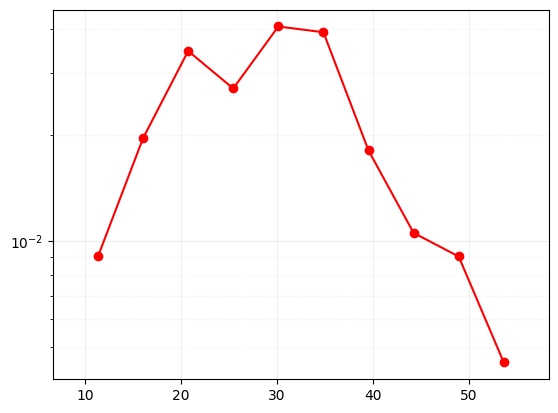

In [9]:
count, bins, ignored = plt.hist(df['count'],10, density=True,# show probability density
                                 alpha=0)
bins_centers = (bins[:-1] + bins[1:]) / 2
plt.plot(bins_centers, count, 'o-', color='r')
plt.yscale('log')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.grid(True, which="minor", ls=":", alpha=0.2)

In [8]:
file_model=Dataset('./Dataset/d4PDF_tropical_cyclone/MRI_HFB_4K_CC_m101.nc','r')
print(file_model.variables.keys())
time_model=file_model.variables['track_time'][:]
masked_time=np.ma.masked_invalid(time_model)
time_model=nc.num2date(masked_time,file_model.variables['track_time'].units 
                    ,only_use_cftime_datetimes=False,only_use_python_datetimes=True)
lat_model=file_model.variables['track_lat'][:]
lon_model=file_model.variables['track_lon'][:]
file_model.close()

dict_keys(['track_time', 'track_lat', 'track_lon', 'track_pres', 'track_wind'])
